## EDA of Google App's Ratings

In [1]:
# IMPORTING LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Uploading the dataset and converting into a dataframe
app_data = pd.read_excel(r"C:\Users\POWER\Desktop\programming\Machine Learning\Projects\app_rating.xlsx")

In [3]:
app_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
app_data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [5]:
app_data.shape

(10841, 13)

In [6]:
# Checking for null values
app_data.isnull().sum()

App                  1
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [7]:
# separating string values from "Size" column
size = list(app_data["Size"])
app_size=[]

for i in range(len(size)):
    a=(size[i].split(sep="M"))[0]
    app_size.append(a)
    
app_data["App_Size"] = app_size
app_data.drop(["Size"], inplace = True, axis=1)

In [8]:
app_data.head()

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App_Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19
1,Coloring book moana,ART_AND_DESIGN,3.9,967,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


In [9]:
# converting "App_Size" and "Reviews" to numeric data
app_data["App_Size"] = pd.to_numeric(app_data["App_Size"], errors= "coerce")
app_data["Reviews"] = pd.to_numeric(app_data["Reviews"], errors= "coerce")

In [10]:
app_data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
App_Size          float64
dtype: object

In [11]:
app_data.describe()

,Rating,Reviews,App_Size
count,9367.000000,1.084000e+04,8829.000000
mean,4.193338,4.441529e+05,22.270540
std,0.537431,2.927761e+06,22.628691
min,1.000000,0.000000e+00,1.000000
25%,4.000000,3.800000e+01,5.400000
50%,4.300000,2.094000e+03,14.000000
75%,4.500000,5.477550e+04,31.000000
max,19.000000,7.815831e+07,100.000000


C:\Users\POWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating'>

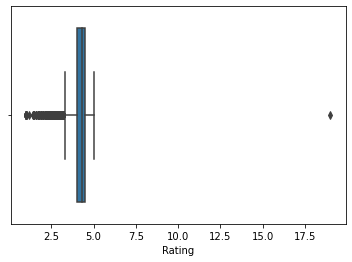

In [12]:
sns.boxplot(app_data["Rating"])

In [13]:
# removing outliers
app_data.loc[app_data["Rating"]> 5]

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App_Size
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN,NaN


In [14]:
app_data.drop([10472], axis=0, inplace = True)

In [15]:
# Removing "$" sign from Price column and converting into numeric value
app_data['Price'] = app_data['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else str(x))
app_data['Price'] = app_data['Price'].apply(lambda x: float(x))

C:\Users\POWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\POWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\POWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\POWER\anaconda3\lib\si

<AxesSubplot:xlabel='App_Size'>

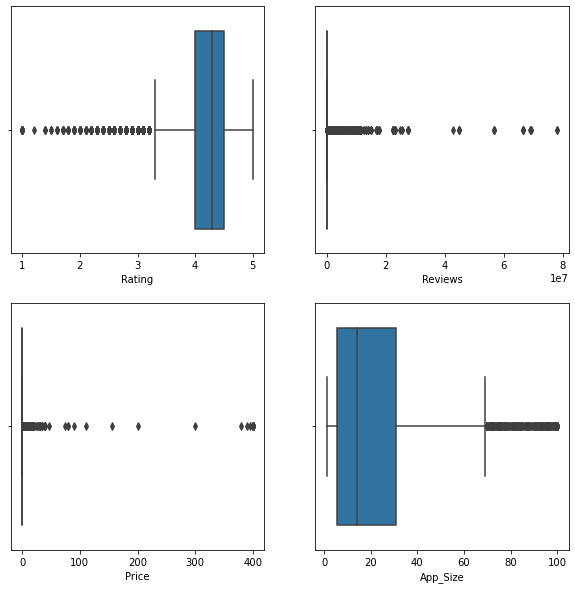

In [16]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
sns.boxplot(app_data["Rating"], ax = ax1)
sns.boxplot(app_data["Reviews"], ax = ax2)
sns.boxplot(app_data["Price"], ax = ax3)
sns.boxplot(app_data["App_Size"], ax = ax4)

In [19]:
# counting null values
app_data.isnull().sum()

App                  1
Category             0
Rating            1474
Reviews              0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
App_Size          2011
dtype: int64

In [20]:
app_data.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
App_Size          float64
dtype: object

In [21]:
# Filling null values with median value
app_data["Rating"] = app_data["Rating"].fillna(app_data["Rating"].median())
app_data["Rating"] = app_data['Rating'].apply(lambda x: float(x))

app_data["Price"] = app_data["Price"].fillna(app_data["Price"].median())
app_data["Price"] = app_data['Price'].apply(lambda x: float(x))

app_data["App_Size"] = app_data["App_Size"].fillna(app_data["App_Size"].median())
app_data["App_Size"] = app_data['App_Size'].apply(lambda x: float(x))

In [22]:
# Another method of imputing null values with median
'''
#Define a function impute_median
def impute_median(series):
    return series.fillna(series.median())
'''

'\n#Define a function impute_median\ndef impute_median(series):\n    return series.fillna(series.median())\n'

In [23]:
# handling missing data
# Filling missing values with median values
'''
app_data["Rating"] = app_data["Rating"].transform(impute_median)
app_data["Price"] = app_data["Price"].transform(impute_median)
app_data["App_Size"] = app_data["App_Size"].transform(impute_median)
'''


'\napp_data["Rating"] = app_data["Rating"].transform(impute_median)\napp_data["Price"] = app_data["Price"].transform(impute_median)\napp_data["App_Size"] = app_data["App_Size"].transform(impute_median)\n'

In [25]:
# counting null values
app_data.isnull().sum()

App               1
Category          0
Rating            0
Reviews           0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
App_Size          0
dtype: int64

In [26]:
# Since null the values left after data cleaning are very less as compared to the size of the dataset, it is better to drop them.
app_data.dropna(subset=["App"], inplace = True)
app_data.dropna(subset=["Type"], inplace = True)
app_data.dropna(subset=["Current Ver"], inplace = True)
app_data.dropna(subset=["Android Ver"], inplace = True)

In [27]:
app_data.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
App_Size          0
dtype: int64

In [28]:
app_data.shape

(10828, 13)

In [29]:
# Converting installs into numeric data
app_data['Installs'] = app_data['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else str(x))
app_data['Installs'] = app_data['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else str(x))
app_data['Installs'] = app_data['Installs'].apply(lambda x: float(x))

In [30]:
app_data.head()    #Inspecting the dataset before visualisation

,App,Category,Rating,Reviews,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,App_Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8


### DATA VISUALIZATION

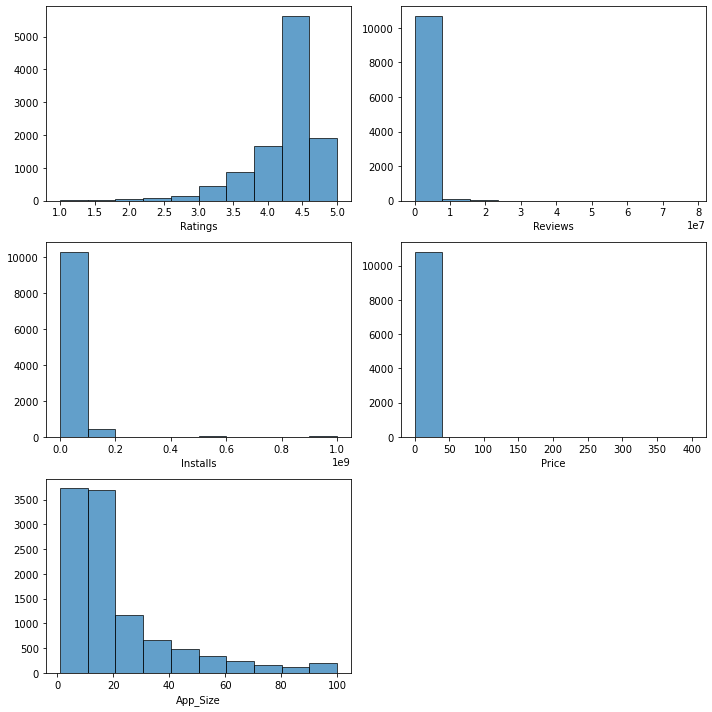

In [33]:
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax1.hist(app_data["Rating"], edgecolor="black", alpha = 0.7)
ax2.hist(app_data["Reviews"], edgecolor="black", alpha = 0.7)
ax3.hist(app_data["Installs"], edgecolor="black", alpha = 0.7)
ax4.hist(app_data["Price"], edgecolor="black", alpha = 0.7)
ax5.hist(app_data["App_Size"], edgecolor="black", alpha = 0.7)
ax1.set_xlabel("Ratings")
ax2.set_xlabel("Reviews")
ax3.set_xlabel("Installs")
ax4.set_xlabel("Price")
ax5.set_xlabel("App_Size")
fig.tight_layout()
plt.show()

In [34]:
# Finding out the correlation of different features with "Rating"
corrmat = app_data.corrwith(app_data["Rating"])

In [35]:
corrmat

Rating      1.000000
Reviews     0.063157
Installs    0.045475
Price      -0.019340
App_Size    0.049227
dtype: float64

<AxesSubplot:>

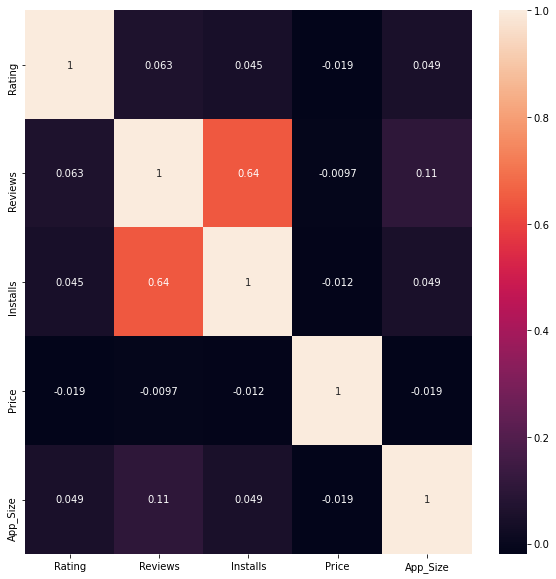

In [36]:
# Visualization of correlations using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(app_data.corr(), annot = True)

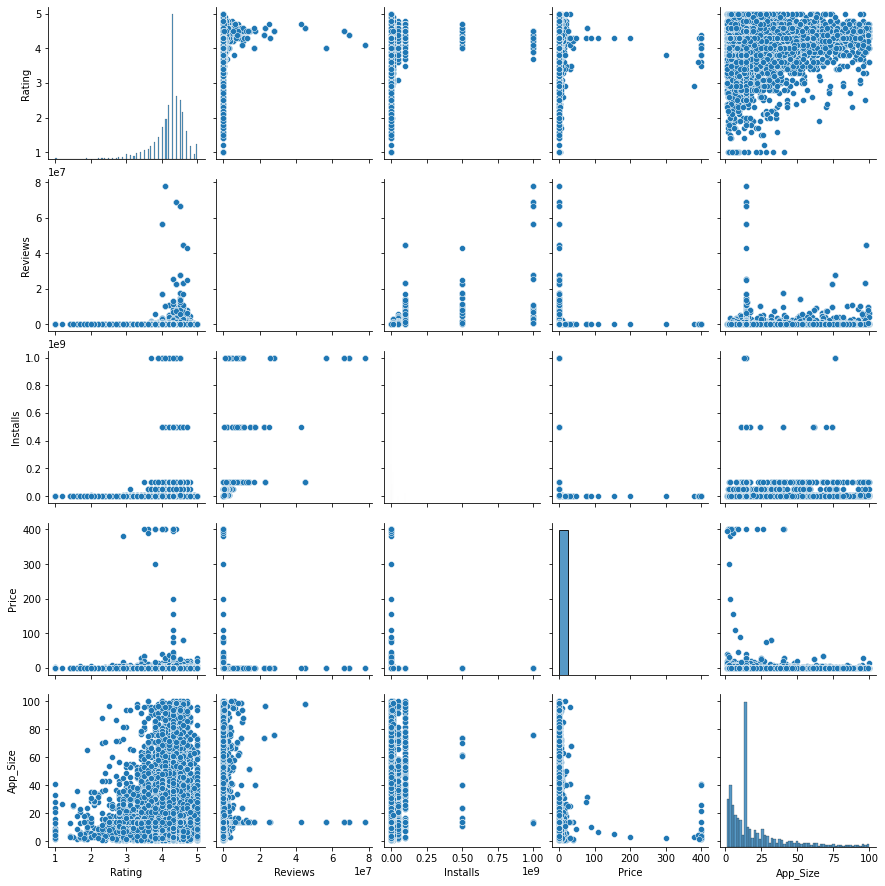

In [37]:
# Pairplot helps us to know about the variation of different features with each other
sns.pairplot(app_data)

C:\Users\POWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


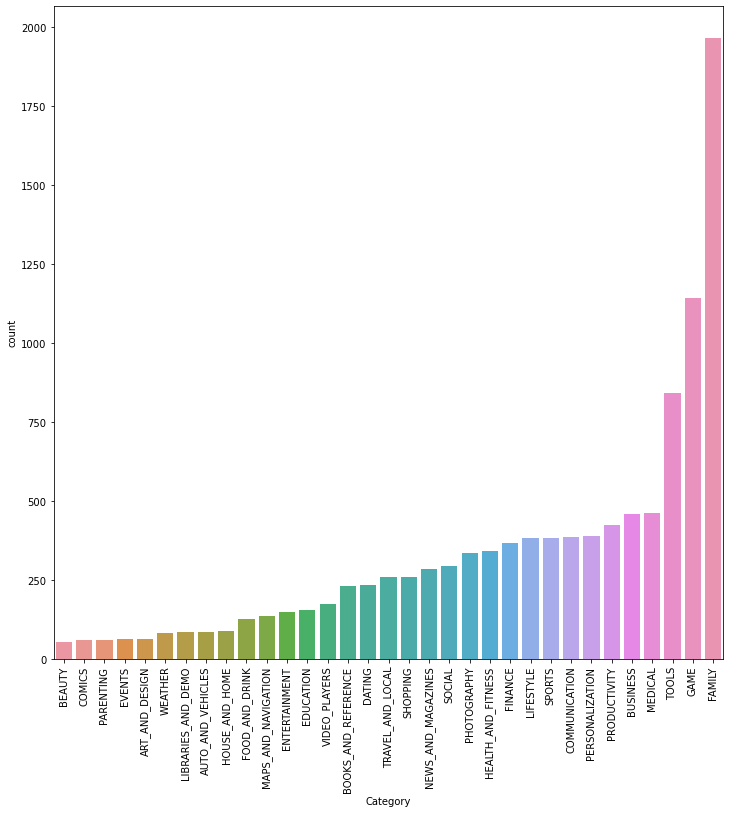

In [38]:
# A countplot showing the number of apps based on "Category"

plt.figure(figsize=(12,12))
chart= sns.countplot(app_data["Category"], order = app_data["Category"].value_counts().sort_values().index)
plt.xticks(rotation = 90)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
None


C:\Users\POWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


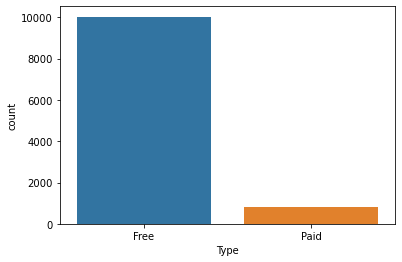

In [40]:
# A countplot showing the number of apps based on "Type"

sns.countplot(app_data["Type"])
None

C:\Users\POWER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


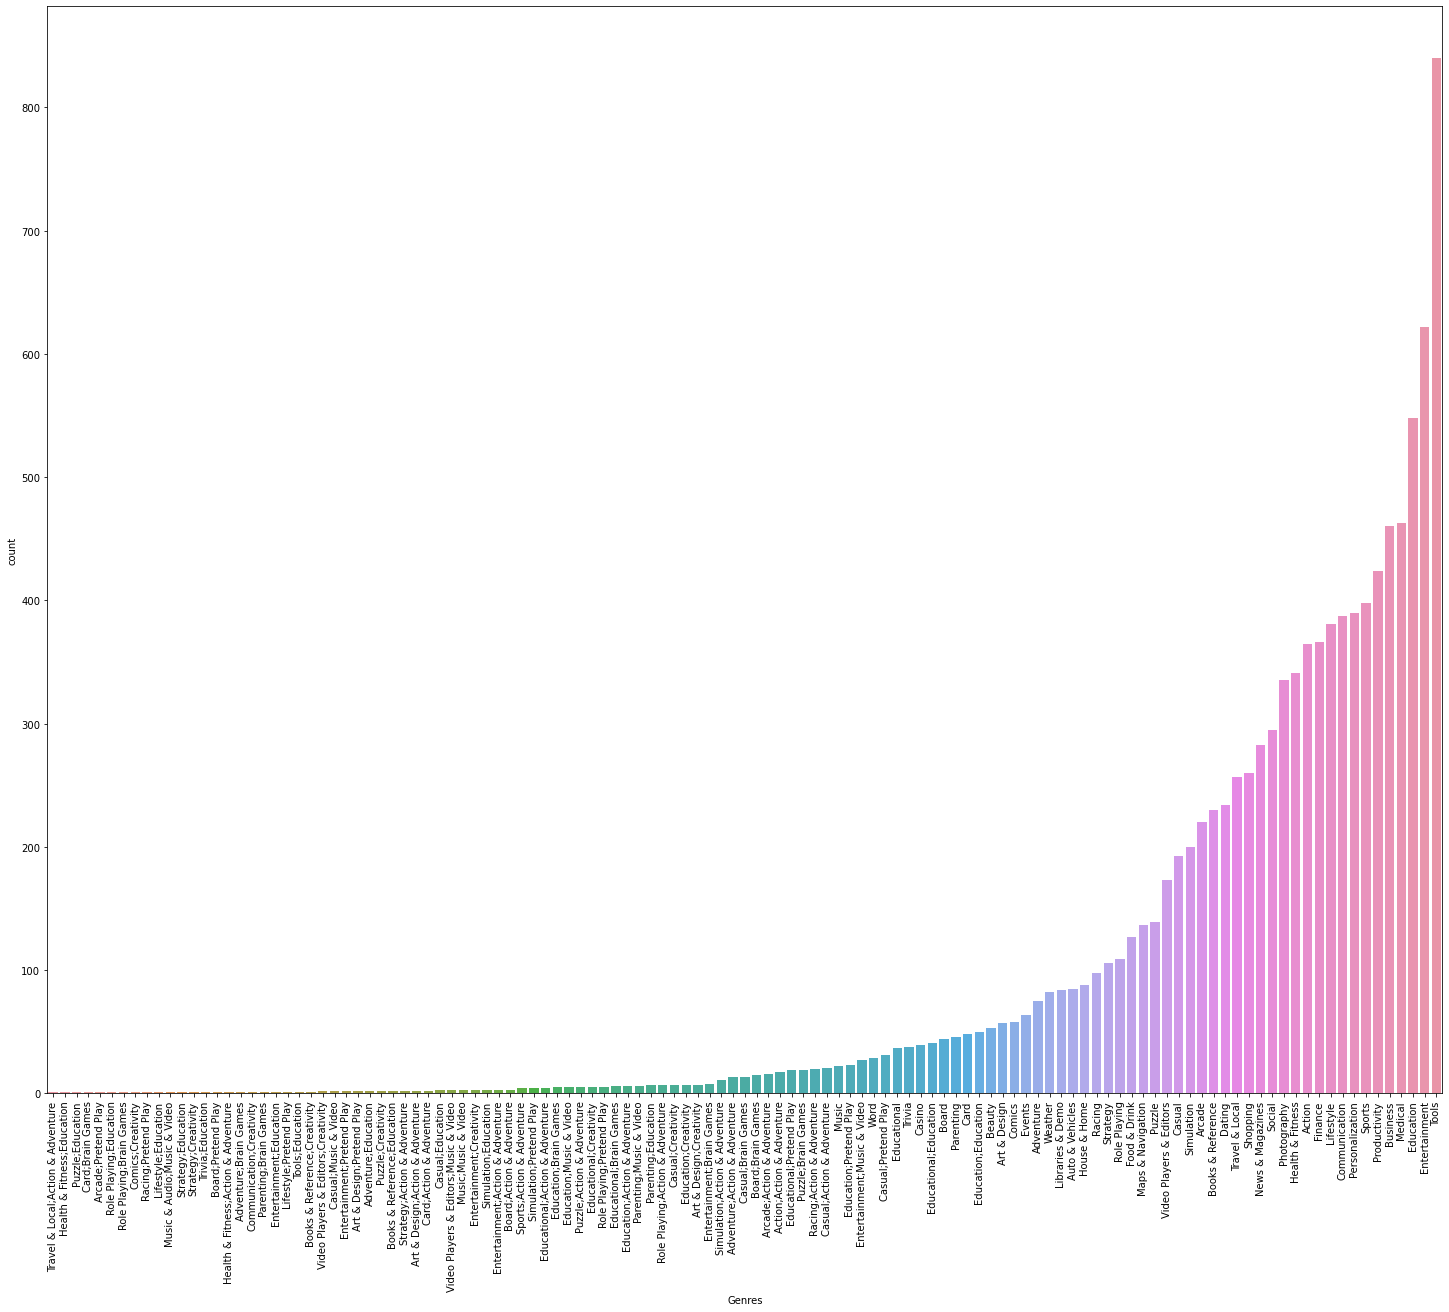

In [41]:
# A countplot showing the number of apps based on "Genres"

plt.figure(figsize=(25,20))
chart= sns.countplot(app_data["Genres"], order = app_data["Genres"].value_counts().sort_values().index)
plt.xticks(rotation = 90)
# chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
None


In [42]:
# Grouping the data by "Category" and visualizing the "Rating", "Price" and "Reviews"

grp = app_data.groupby('Category')
x = grp['Rating'].agg(np.mean)
y = grp['Price'].agg(np.sum)
z = grp['Reviews'].agg(np.mean)
print(x)
print(y)
print(z)

Category
ART_AND_DESIGN         4.373437
AUTO_AND_VEHICLES      4.205882
BEAUTY                 4.283019
BOOKS_AND_REFERENCE    4.335652
BUSINESS               4.182391
COMICS                 4.171186
COMMUNICATION          4.180103
DATING                 4.025641
EDUCATION              4.388462
ENTERTAINMENT          4.126174
EVENTS                 4.395313
FAMILY                 4.204522
FINANCE                4.151639
FOOD_AND_DRINK         4.185827
GAME                   4.286888
HEALTH_AND_FITNESS     4.280059
HOUSE_AND_HOME         4.211364
LIBRARIES_AND_DEMO     4.208333
LIFESTYLE              4.131414
MAPS_AND_NAVIGATION    4.075182
MEDICAL                4.216199
NEWS_AND_MAGAZINES     4.161837
PARENTING              4.300000
PERSONALIZATION        4.328205
PHOTOGRAPHY            4.197910
PRODUCTIVITY           4.226651
SHOPPING               4.263077
SOCIAL                 4.261017
SPORTS                 4.236458
TOOLS                  4.079667
TRAVEL_AND_LOCAL       4.132946

Text(0.5, 1.0, 'Average Ratings of different Categories')

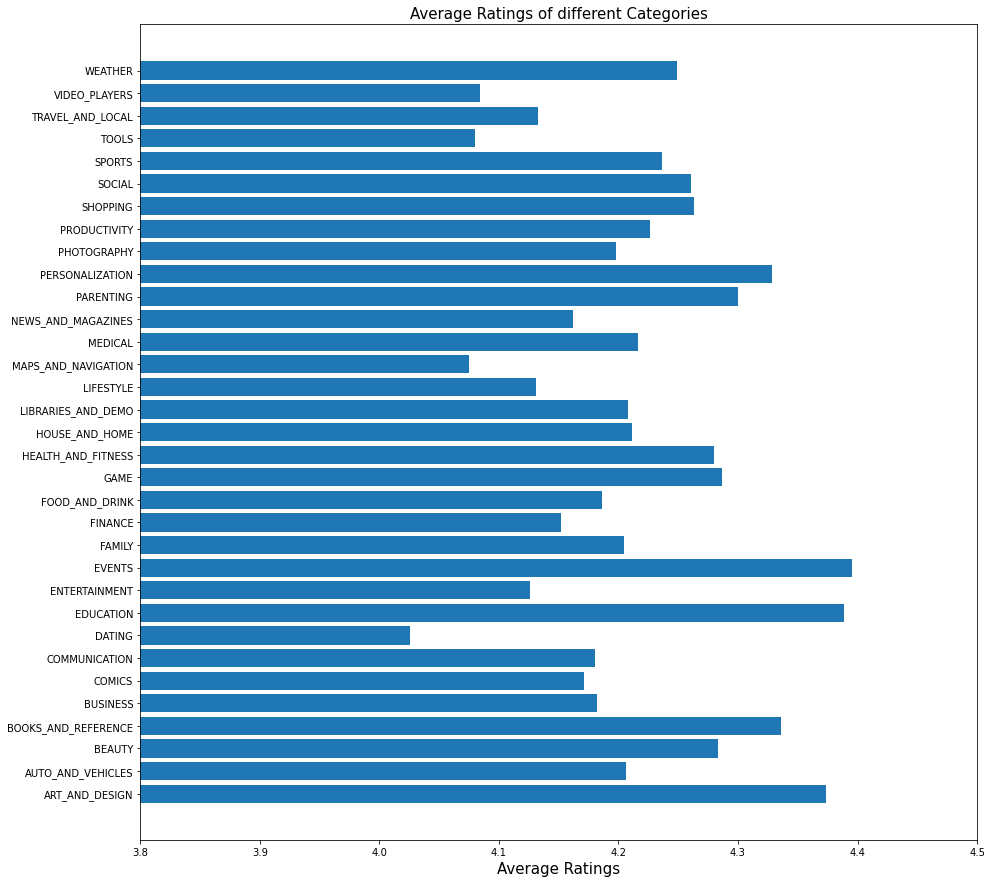

In [43]:
fig, ax = plt.subplots(figsize=(15,15))    
ax.barh(x.index, x.values)
ax.set_xlim(3.8,4.5)
ax.set_xlabel("Average Ratings", fontsize=15)
ax.set_title("Average Ratings of different Categories", fontsize=15)
# for i, v in enumerate(y):
#     ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold',transform=ax.transAxes)

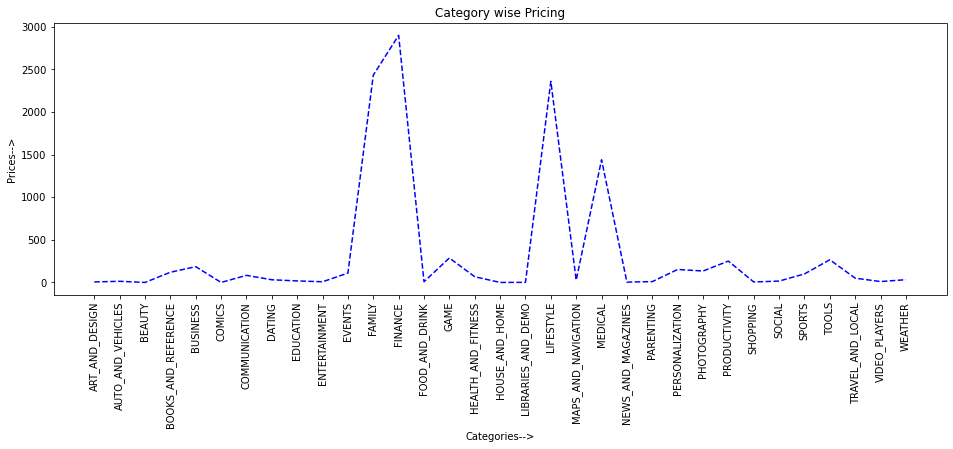

In [44]:
plt.figure(figsize=(16,5))
plt.plot(y,'r--', color='b')
plt.xticks(rotation=90)
plt.title('Category wise Pricing')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show()

Text(0.5, 1.0, 'Category wise Reviewss')

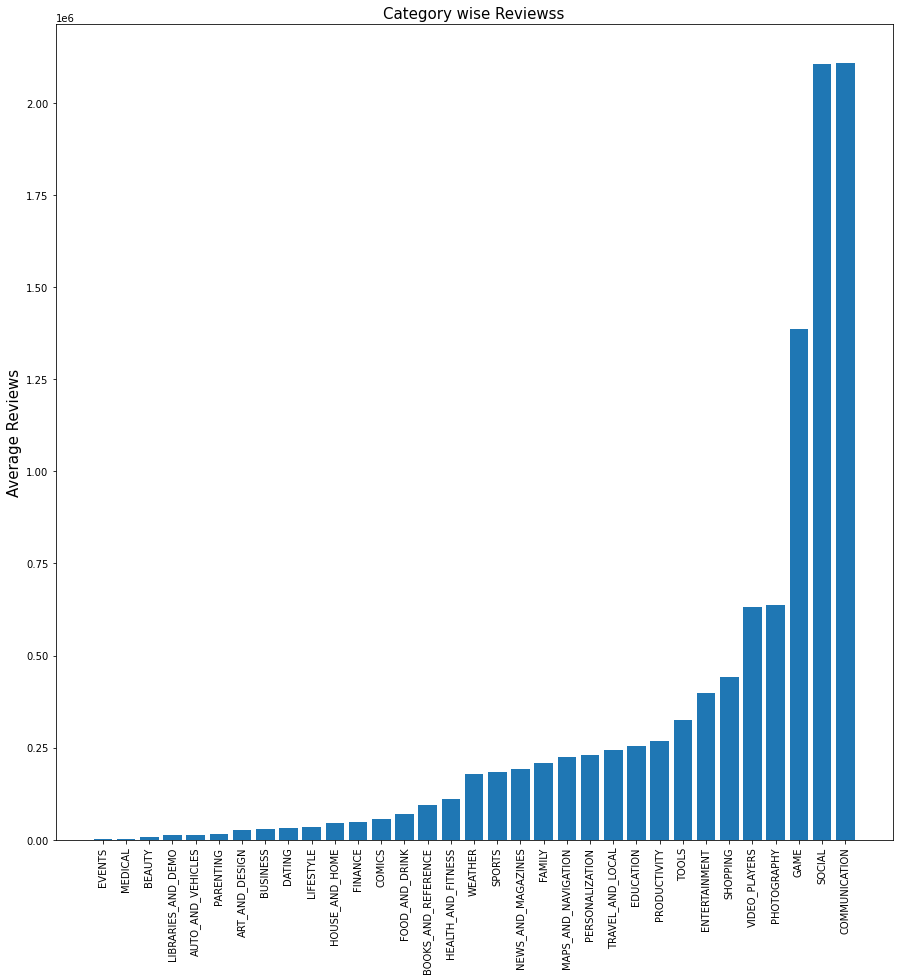

In [45]:
fig, ax = plt.subplots(figsize=(15,15))  
z=z.sort_values()
ax.bar(z.index, z.values)
plt.xticks(rotation=90)
ax.set_ylabel("Average Reviews", fontsize=15)
ax.set_title("Category wise Reviewss", fontsize=15)

In [ ]:
# https://github.com/DivyaThakur24/GoogleAppRating-DataAnalysis/blob/master/.ipynb_checkpoints/Prediction%20of%20Google%20Apps%20Rating-checkpoint.ipynb

### THE END